In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import *
from pyspark.sql import SparkSession

In [2]:
#Create Spark Session
spark = SparkSession.builder\
                    .master("local")\
                    .appName("appName")\
                    .config("Some.spark.option.config","somevalue")\
                    .getOrCreate()

In [3]:
df = spark.read.format("csv").option("header","true").load("C:\\Arunava Docs\\Pyspark Resourse\\ML\\Masroom\\mushrooms.csv")

In [4]:
df.show(3, truncate=False)

+-----+---------+-----------+---------+-------+----+---------------+------------+---------+----------+-----------+----------+------------------------+------------------------+----------------------+----------------------+---------+----------+-----------+---------+-----------------+----------+-------+
|class|cap-shape|cap-surface|cap-color|bruises|odor|gill-attachment|gill-spacing|gill-size|gill-color|stalk-shape|stalk-root|stalk-surface-above-ring|stalk-surface-below-ring|stalk-color-above-ring|stalk-color-below-ring|veil-type|veil-color|ring-number|ring-type|spore-print-color|population|habitat|
+-----+---------+-----------+---------+-------+----+---------------+------------+---------+----------+-----------+----------+------------------------+------------------------+----------------------+----------------------+---------+----------+-----------+---------+-----------------+----------+-------+
|p    |x        |s          |n        |t      |p   |f              |c           |n        |k  

In [5]:
print("Rows: ",df.count())
print("Columns: ",len(df.columns))

Rows:  8124
Columns:  23


In [6]:
df.printSchema()

root
 |-- class: string (nullable = true)
 |-- cap-shape: string (nullable = true)
 |-- cap-surface: string (nullable = true)
 |-- cap-color: string (nullable = true)
 |-- bruises: string (nullable = true)
 |-- odor: string (nullable = true)
 |-- gill-attachment: string (nullable = true)
 |-- gill-spacing: string (nullable = true)
 |-- gill-size: string (nullable = true)
 |-- gill-color: string (nullable = true)
 |-- stalk-shape: string (nullable = true)
 |-- stalk-root: string (nullable = true)
 |-- stalk-surface-above-ring: string (nullable = true)
 |-- stalk-surface-below-ring: string (nullable = true)
 |-- stalk-color-above-ring: string (nullable = true)
 |-- stalk-color-below-ring: string (nullable = true)
 |-- veil-type: string (nullable = true)
 |-- veil-color: string (nullable = true)
 |-- ring-number: string (nullable = true)
 |-- ring-type: string (nullable = true)
 |-- spore-print-color: string (nullable = true)
 |-- population: string (nullable = true)
 |-- habitat: string 

In [7]:
df = df.drop_duplicates()

In [8]:
print("Rows: ",df.count())
print("Columns: ",len(df.columns))

Rows:  8124
Columns:  23


In [9]:
from pyspark.sql.functions import monotonically_increasing_id
df = df.withColumn("ID", monotonically_increasing_id())
df.show(2)

+-----+---------+-----------+---------+-------+----+---------------+------------+---------+----------+-----------+----------+------------------------+------------------------+----------------------+----------------------+---------+----------+-----------+---------+-----------------+----------+-------+---+
|class|cap-shape|cap-surface|cap-color|bruises|odor|gill-attachment|gill-spacing|gill-size|gill-color|stalk-shape|stalk-root|stalk-surface-above-ring|stalk-surface-below-ring|stalk-color-above-ring|stalk-color-below-ring|veil-type|veil-color|ring-number|ring-type|spore-print-color|population|habitat| ID|
+-----+---------+-----------+---------+-------+----+---------------+------------+---------+----------+-----------+----------+------------------------+------------------------+----------------------+----------------------+---------+----------+-----------+---------+-----------------+----------+-------+---+
|    e|        x|          y|        y|      t|   l|              f|           c| 

## Mapping

In [10]:
mapping = {
    
"class" : {"e": "edible", "p": "poisonous"},

"cap-shape" : {"b": "bell", "c": "conical", "x": "convex", "f": "flat", "k": "knobbed", "s": "sunken"},

"cap-surface" : { "f": "fibrous", "g": "grooves", "y": "scaly", "s": "smooth"},

"cap-color" : { "n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "r": "green", "p": "pink", "u": "purple", "e": "red", "w": "white", "y": "yellow"},

"bruises" : {"t": "bruises", "f": "no"},

"odor" : { "a": "almond", "l": "anise", "c": "creosote", "y": "fishy", "f": "foul","m": "musty", "n": "none", "p": "pungent", "s": "spicy"},

"gill-attachment" : {"a": "attached", "d": "descending", "f": "free", "n": "notched"},

"gill-spacing" : { "c": "close", "w": "crowded", "d": "distant"},

"gill-size" : {  "b": "broad", "n": "narrow"},

"gill-color" : {  "k": "black", "n": "brown", "b": "buff", "h": "chocolate", "g": "gray", "r": "green", "o": "orange", "p": "pink", "u": "purple", "e": "red", "w": "white", "y": "yellow"},

"stalk-shape" : { "e": "enlarging", "t": "tapering"},

"stalk-root" : { "b": "bulbous", "c": "club", "u": "cup", "e": "equal", "z": "rhizomorphs", "r": "rooted", "?": "missing"},

"stalk-surface-above-ring" : {"f": "fibrous", "y": "scaly", "k": "silky", "s": "smooth"},

"stalk-surface-below-ring" : {"f": "fibrous", "y": "scaly", "k": "silky", "s": "smooth"},

"stalk-color-above-ring" : {  "n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "o": "orange",  "p": "pink", "e": "red", "w": "white", "y": "yellow"},

"stalk-color-below-ring" : {"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "o": "orange", "p": "pink", "e": "red", "w": "white", "y": "yellow"},

"veil-type" : { "p": "partial", "u": "universal"},

"veil-color" : {"n": "brown", "o": "orange", "w": "white", "y": "yellow"},

"ring-number" : { "n": "none", "o": "one", "t": "two"},

"ring-type" : {"c": "cobwebby", "e": "evanescent", "f": "flaring", "l": "large", "n": "none", "p": "pendant", "s": "sheathing", "z": "zone"},

"spore-print-color" : { "k": "black", "n": "brown", "b": "buff", "h": "chocolate", "r": "green", "o": "orange", "u": "purple", "w": "white", "y": "yellow"},

"population" : { "a": "abundant", "c": "clustered", "n": "numerous", "s": "scattered", "v": "several", "y": "solitary"},

"habitat" : {"g": "grasses", "l": "leaves", "m": "meadows", "p": "paths", "u": "urban", "w": "waste", "d": "woods"}
    }

In [11]:
from pyspark.sql.functions import create_map, col, lit
from itertools import chain



for i, map_dict in mapping.items():
    mapping_expr = create_map([lit(x) for x in chain(*map_dict.items())])
    df = df.withColumn(i, mapping_expr[col(i)])

In [12]:
df.show(1)

+------+---------+-----------+---------+-------+-----+---------------+------------+---------+----------+-----------+----------+------------------------+------------------------+----------------------+----------------------+---------+----------+-----------+---------+-----------------+----------+-------+---+
| class|cap-shape|cap-surface|cap-color|bruises| odor|gill-attachment|gill-spacing|gill-size|gill-color|stalk-shape|stalk-root|stalk-surface-above-ring|stalk-surface-below-ring|stalk-color-above-ring|stalk-color-below-ring|veil-type|veil-color|ring-number|ring-type|spore-print-color|population|habitat| ID|
+------+---------+-----------+---------+-------+-----+---------------+------------+---------+----------+-----------+----------+------------------------+------------------------+----------------------+----------------------+---------+----------+-----------+---------+-----------------+----------+-------+---+
|edible|   convex|      scaly|   yellow|bruises|anise|           free|      

## Group By

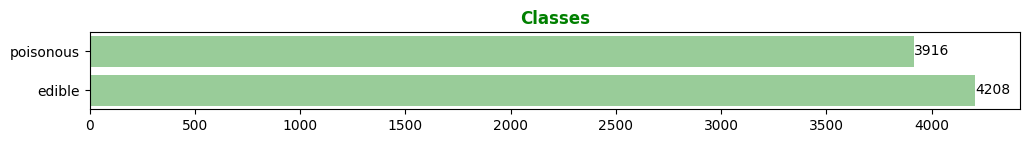

In [13]:
classes = df.groupBy('class').agg(count('*').alias("count"))
classes = classes.toPandas()

figsize = plt.figure(figsize = (12,1))
plt.title('Classes', color='g', fontsize=12, fontweight='bold')
bars = plt.barh(classes['class'],classes["count"], color='g', alpha=0.4)

# Display value on top of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2.0, f'{width}', va='center')

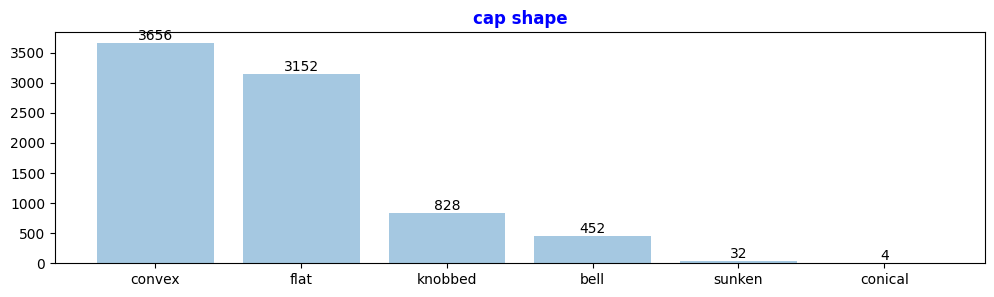

In [14]:
capshape = df.groupBy('cap-shape').agg(count('*').alias("count")).orderBy("count", ascending = False)
capshape = capshape.toPandas()


figsize = plt.figure(figsize = (12,3))
plt.title('cap shape', color='b', fontsize=12, fontweight='bold')
bars = plt.bar(capshape['cap-shape'],capshape["count"], alpha = 0.4)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 1, f'{height}', ha='center', va='bottom')
plt.show()

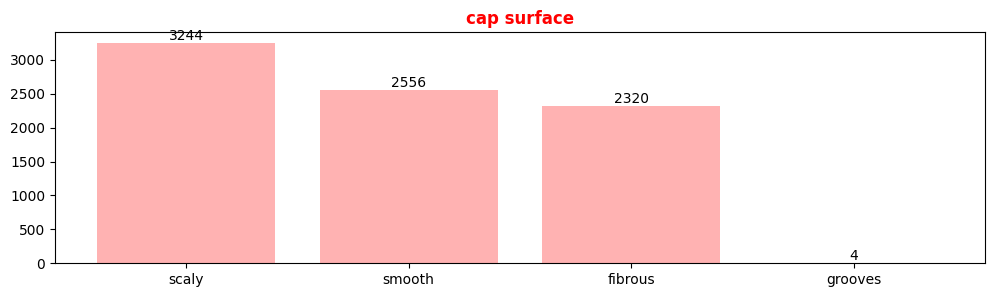

In [15]:
capsurface = df.groupBy('cap-surface').agg(count('*').alias("count")).orderBy("count", ascending = False)
capsurface = capsurface.toPandas()


figsize = plt.figure(figsize = (12,3))
plt.title('cap surface', color='r', fontsize=12, fontweight='bold')
bars = plt.bar(capsurface['cap-surface'],capsurface["count"], color = 'r', alpha = 0.3)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 1, f'{height}', ha='center', va='bottom')
plt.show()

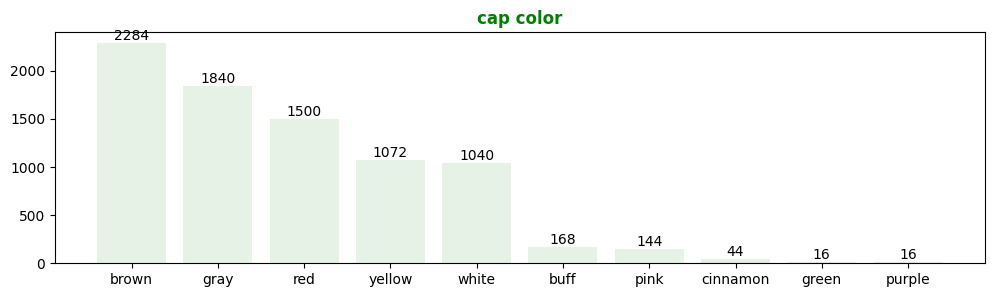

In [16]:
capcolor = df.groupBy('cap-color').agg(count('*').alias("count")).orderBy("count", ascending = False)
capcolor = capcolor.toPandas()

figsize = plt.figure(figsize = (12,3))
plt.title('cap color', color='g', fontsize=12, fontweight='bold')
bars = plt.bar(capcolor['cap-color'],capcolor["count"], color = 'g', alpha = 0.1)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 1, f'{height}', ha='center', va='bottom')
plt.show()

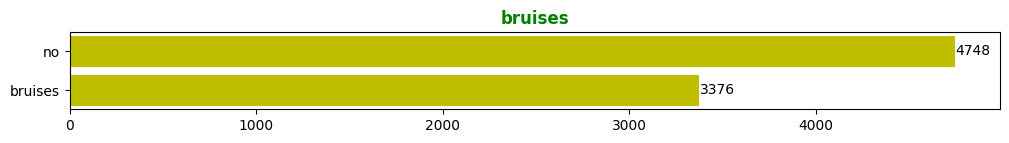

In [17]:
bruises = df.groupBy('bruises').agg(count('*').alias("count"))
bruises = bruises.toPandas()

figsize = plt.figure(figsize = (12,1))
plt.title('bruises', color='g', fontsize=12, fontweight='bold')
bars = plt.barh(bruises['bruises'],bruises["count"], color ='y')
# Display value on top of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2.0, f'{width}', va='center')

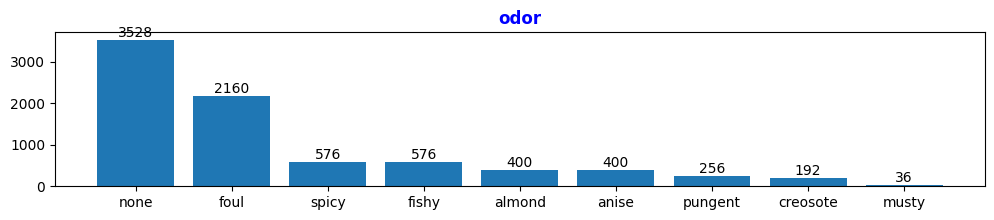

In [18]:
odor = df.groupBy('odor').agg(count('*').alias("count")).orderBy("count",ascending = False)
odor = odor.toPandas()

figsize = plt.figure(figsize = (12,2))
plt.title('odor', color='b', fontsize=12, fontweight='bold')
bars = plt.bar(odor['odor'],odor["count"])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 1, f'{height}', ha='center', va='bottom')
plt.show()

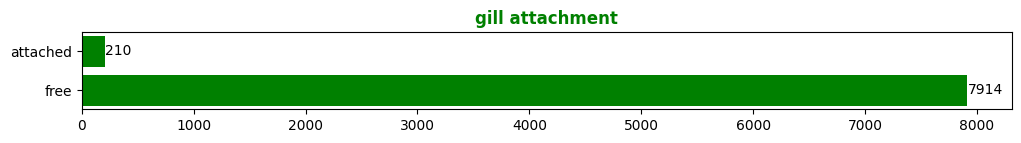

In [19]:
gillattachment = df.groupBy('gill-attachment').agg(count('*').alias("count"))
gillattachment = gillattachment.toPandas()

figsize = plt.figure(figsize = (12,1))
plt.title('gill attachment', color='g', fontsize=12, fontweight='bold')
bars = plt.barh(gillattachment['gill-attachment'],gillattachment["count"], color ='g')
# Display value on top of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2.0, f'{width}', va='center')

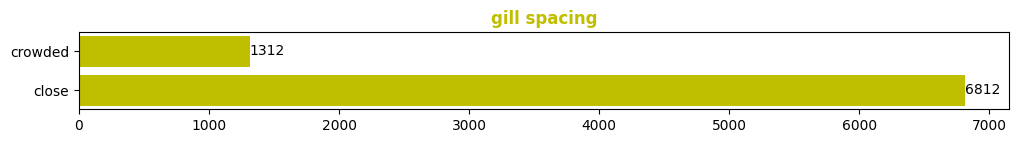

In [20]:
gillspacing = df.groupBy('gill-spacing').agg(count('*').alias("count"))
gillspacing = gillspacing.toPandas()

figsize = plt.figure(figsize = (12,1))
plt.title('gill spacing', color='y', fontsize=12, fontweight='bold')
bars = plt.barh(gillspacing['gill-spacing'],gillspacing["count"], color='y')
# Display value on top of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2.0, f'{width}', va='center')

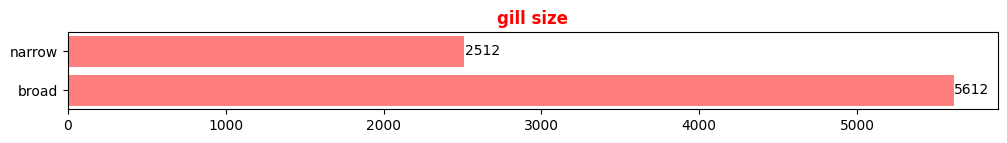

In [21]:
gillsize = df.groupBy('gill-size').agg(count('*').alias("count"))
gillsize = gillsize.toPandas()

figsize = plt.figure(figsize = (12,1))
plt.title('gill size', color='r', fontsize=12, fontweight='bold')
bars = plt.barh(gillsize['gill-size'],gillsize["count"], color = 'r', alpha=0.5)
# Display value on top of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2.0, f'{width}', va='center')

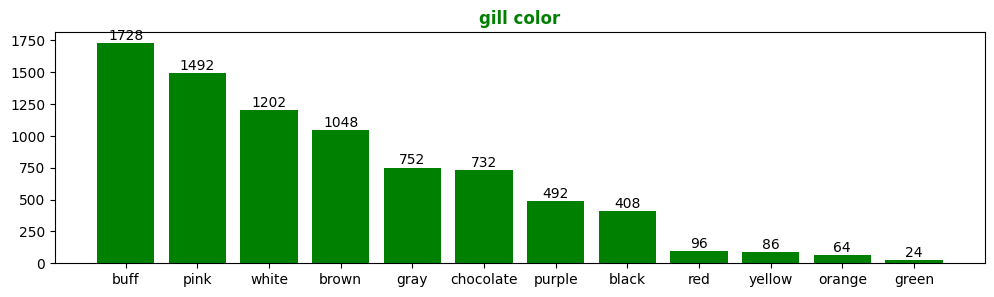

In [22]:
gillcolor = df.groupBy('gill-color').agg(count('*').alias("count")).orderBy("count",ascending = False)
gillcolor = gillcolor.toPandas()

figsize = plt.figure(figsize = (12,3))
plt.title('gill color', color='g', fontsize=12, fontweight='bold')
bars = plt.bar(gillcolor['gill-color'],gillcolor["count"], color='g')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 1, f'{height}', ha='center', va='bottom')
plt.show()

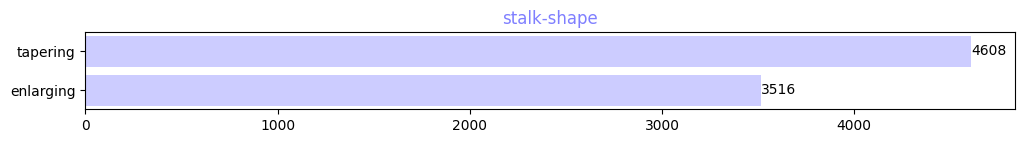

In [23]:
stalkshape = df.groupBy('stalk-shape').agg(count('*').alias("count"))
stalkshape = stalkshape.toPandas()

figsize = plt.figure(figsize = (12,1))
plt.title('stalk-shape', color='b', fontsize=12, alpha=0.5)
bars = plt.barh(stalkshape['stalk-shape'],stalkshape["count"], color= 'b', alpha=0.2)
# Display value on top of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2.0, f'{width}', va='center')

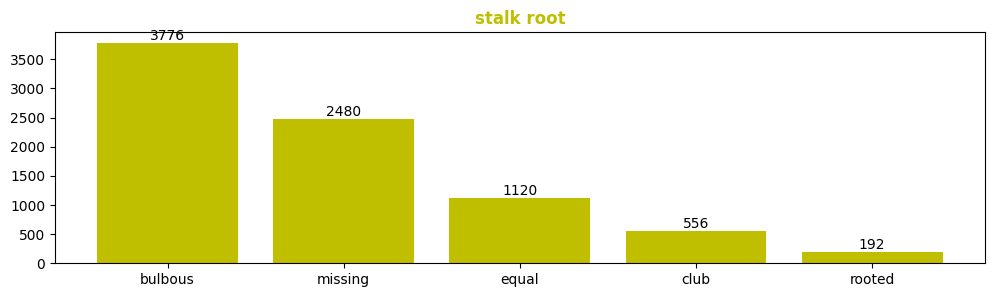

In [24]:
stalkroot = df.groupBy('stalk-root').agg(count('*').alias("count")).orderBy('count', ascending = False)
stalkroot = stalkroot.toPandas()

figsize = plt.figure(figsize = (12,3))
plt.title('stalk root', color='y', fontsize=12, fontweight='bold')
bars = plt.bar(stalkroot['stalk-root'],stalkroot["count"], color ='y')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 1, f'{height}', ha='center', va='bottom')
plt.show()

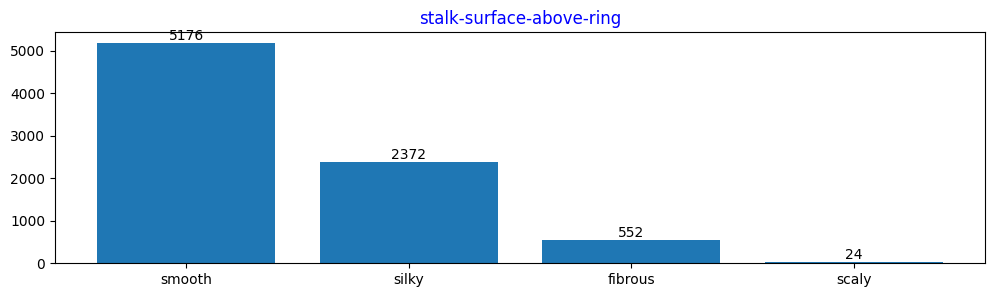

In [25]:
stalk1 = df.groupBy('stalk-surface-above-ring').agg(count('*').alias("count")).orderBy('count', ascending = False)
stalk1 = stalk1.toPandas()

figsize = plt.figure(figsize = (12,3))
plt.title('stalk-surface-above-ring', color='b', fontsize=12)
bars  = plt.bar(stalk1['stalk-surface-above-ring'],stalk1["count"])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 1, f'{height}', ha='center', va='bottom')
plt.show()

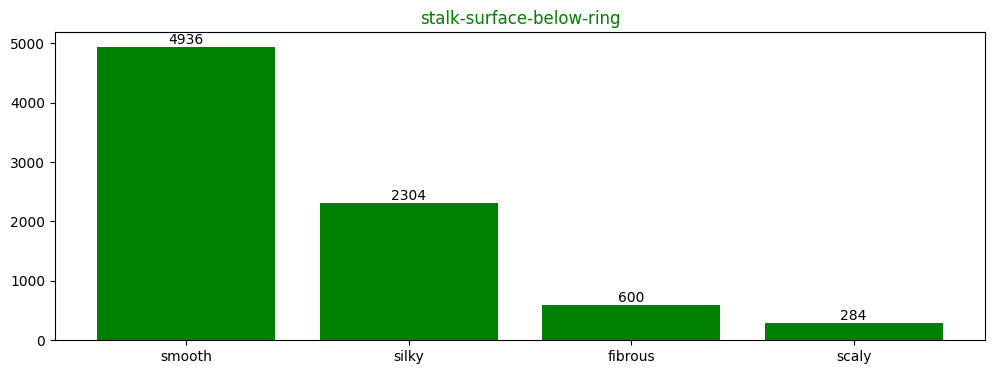

In [26]:
stalk2 = df.groupBy('stalk-surface-below-ring').agg(count('*').alias("count")).orderBy('count', ascending = False)
stalk2 = stalk2.toPandas()

figsize = plt.figure(figsize = (12,4))
plt.title('stalk-surface-below-ring', color='g', fontsize=12)
bars = plt.bar(stalk2['stalk-surface-below-ring'],stalk2["count"], color ='g')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 1, f'{height}', ha='center', va='bottom')
plt.show()

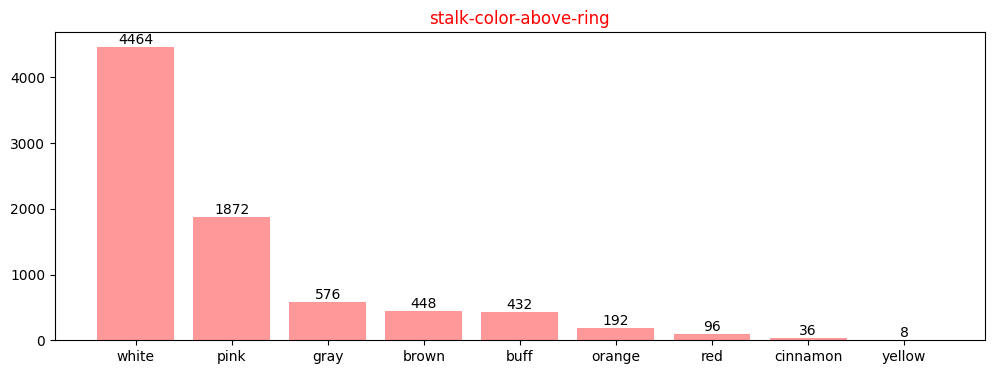

In [27]:
stalk3 = df.groupBy('stalk-color-above-ring').agg(count('*').alias("count")).orderBy('count', ascending = False)
stalk3 = stalk3.toPandas()

figsize = plt.figure(figsize = (12,4))
plt.title('stalk-color-above-ring', color='r', fontsize=12)
bars = plt.bar(stalk3['stalk-color-above-ring'],stalk3["count"], color ='r', alpha=0.4)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 1, f'{height}', ha='center', va='bottom')
plt.show()

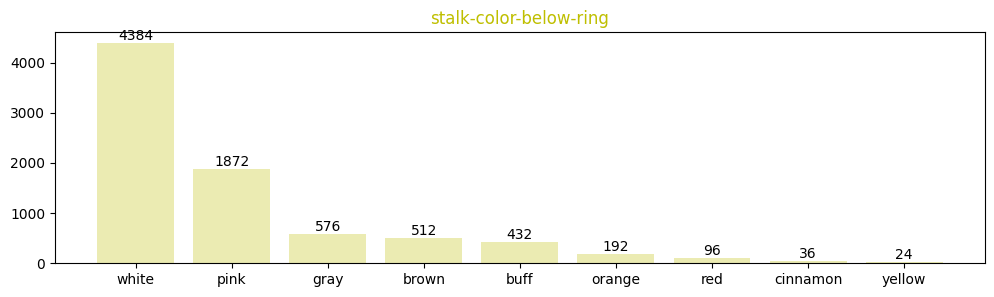

In [28]:
stalk4 = df.groupBy('stalk-color-below-ring').agg(count('*').alias("count")).orderBy('count', ascending = False)
stalk4 = stalk4.toPandas()

figsize = plt.figure(figsize = (12,3))
plt.title('stalk-color-below-ring', color='y', fontsize=12)
bars = plt.bar(stalk4['stalk-color-below-ring'],stalk4["count"], color='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 1, f'{height}', ha='center', va='bottom')
plt.show()

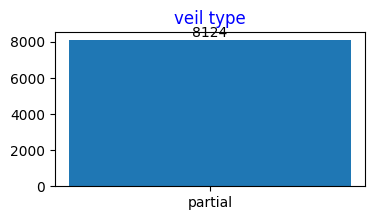

In [29]:
veiltype = df.groupBy('veil-type').agg(count('*').alias("count"))
veiltype = veiltype.toPandas()

figsize = plt.figure(figsize = (4,2))
plt.title('veil type', color='b', fontsize=12)
bars = plt.bar(veiltype['veil-type'],veiltype["count"])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 1, f'{height}', ha='center', va='bottom')
plt.show()

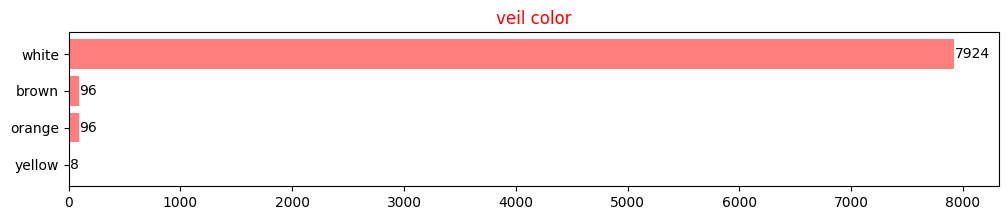

In [30]:
veilcolor = df.groupBy('veil-color').agg(count('*').alias("count")).orderBy('count', ascending = True)
veilcolor = veilcolor.toPandas()

figsize = plt.figure(figsize = (12,2))
plt.title('veil color', color='r', fontsize=12)
bars = plt.barh(veilcolor['veil-color'],veilcolor["count"], color='r', alpha=0.5)
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2.0, f'{width}', va='center')

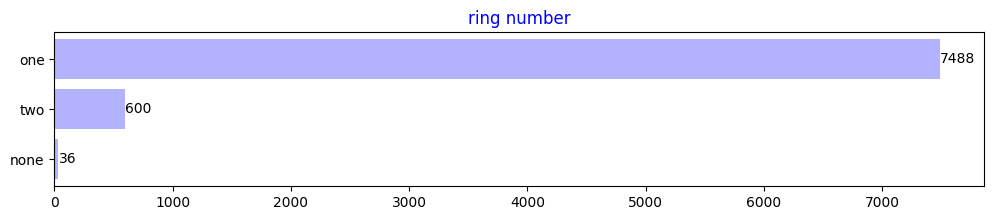

In [31]:
ringnumber = df.groupBy('ring-number').agg(count('*').alias("count")).orderBy('count', ascending = True)
ringnumber = ringnumber.toPandas()

figsize = plt.figure(figsize = (12,2))
plt.title('ring number', color='b', fontsize=12)
bars = plt.barh(ringnumber['ring-number'],ringnumber["count"], color='b', alpha=0.3)
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2.0, f'{width}', va='center')
plt.show()

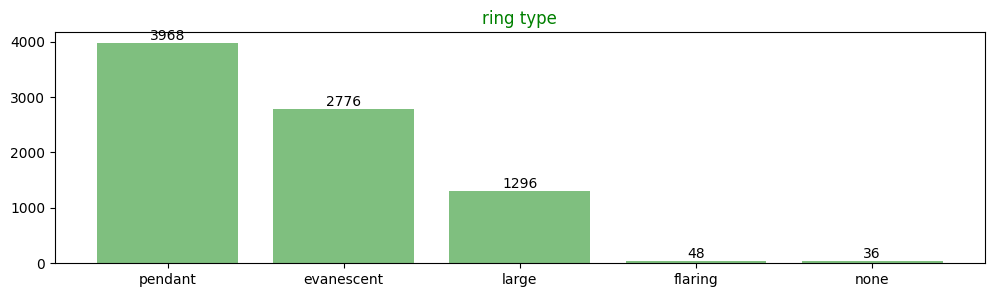

In [32]:
ringtype = df.groupBy('ring-type').agg(count('*').alias("count")).orderBy('count', ascending = False)
ringtype = ringtype.toPandas()

figsize = plt.figure(figsize = (12,3))
plt.title('ring type', color='g', fontsize=12)
bars = plt.bar(ringtype['ring-type'],ringtype["count"], color='g', alpha=0.5)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 1, f'{height}', ha='center', va='bottom')
plt.show()

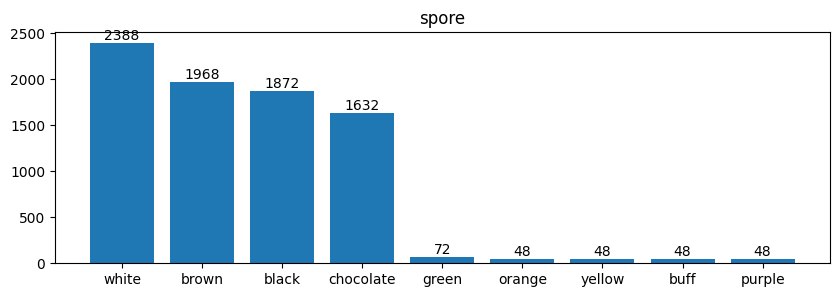

In [33]:
spore = df.groupBy('spore-print-color').agg(count('*').alias("count")).orderBy('count', ascending = False)
spore = spore.toPandas()

figsize = plt.figure(figsize = (10,3))
plt.title('spore', fontsize=12)
bars = plt.bar(spore['spore-print-color'],spore["count"])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 1, f'{height}', ha='center', va='bottom')
plt.show()

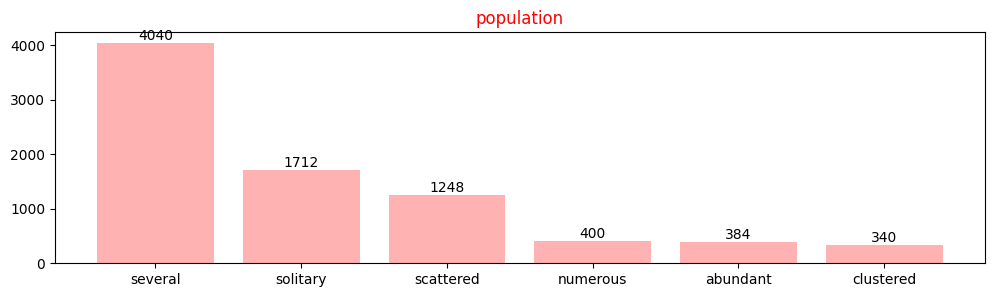

In [34]:
population = df.groupBy('population').agg(count('*').alias("count")).orderBy('count', ascending = False)
population = population.toPandas()

figsize = plt.figure(figsize = (12,3))
plt.title('population', color='r', fontsize=12)
bars = plt.bar(population['population'],population["count"], color='r', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 1, f'{height}', ha='center', va='bottom')
plt.show()

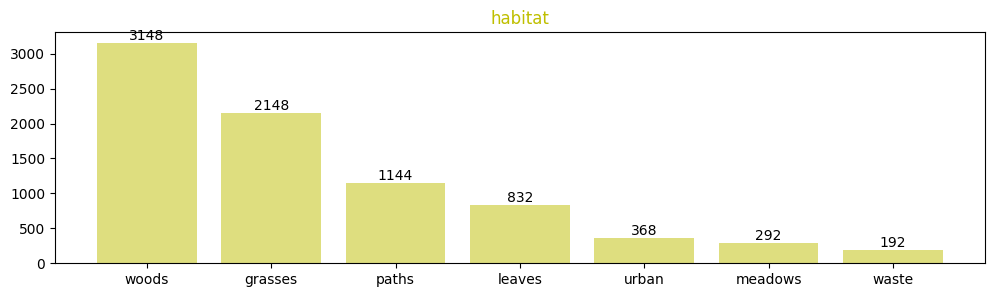

In [35]:
habitat = df.groupBy('habitat').agg(count('*').alias("count")).orderBy('count', ascending = False)
habitat = habitat.toPandas()

figsize = plt.figure(figsize = (12,3))
plt.title('habitat', color='y', fontsize=12)
bars = plt.bar(habitat['habitat'], habitat["count"], color='y',alpha=0.5)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 1, f'{height}', ha='center', va='bottom')
plt.show()

## Encoding 

In [36]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [37]:
df_pd = df.toPandas()
X = df_pd.drop(["ID", "class", "veil-type"], axis=1)
y = df_pd["class"]

In [38]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [39]:
t = ColumnTransformer(transformers =[
    ('t1', OneHotEncoder(sparse_output=False, drop='first'),
    ['cap-shape','cap-surface','cap-color','odor','gill-color',
     'stalk-root','stalk-surface-above-ring','stalk-surface-below-ring',
     'stalk-color-above-ring','stalk-color-below-ring','veil-color',
     'ring-number','ring-type','spore-print-color','population','habitat']),
    ('t2', OrdinalEncoder(),
    ['bruises', 'gill-attachment', 'gill-spacing', 'gill-size', 'stalk-shape'])
])

In [40]:
# Apply the transformation
x = t.fit_transform(X)

## Model Tranning

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x.shape)
print(y.shape)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(8124, 95)
(8124,)
(6499, 95)
(6499,)
(1625, 95)
(1625,)


# Keras

In [42]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
!pip install keras

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
import keras
from keras.layers import Dense, Input, Dropout

In [45]:
model = keras.Sequential([
    Input(shape=(95,)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1,activation='sigmoid')
])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           6,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,257 (32.25 KB)

 Trainable params: 8,257 (32.25 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [48]:
model.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=10,
    validation_data = (x_test, y_test)
)

Epoch 1/5
650/650 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9580 - loss: 0.1157 - val_accuracy: 0.9994 - val_loss: 0.0030
Epoch 2/5
650/650 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9992 - loss: 0.0047 - val_accuracy: 1.0000 - val_loss: 4.5339e-04
Epoch 3/5
650/650 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9998 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 1.0519e-04
Epoch 4/5
650/650 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 3.4742e-04 - val_accuracy: 1.0000 - val_loss: 3.7538e-05
Epoch 5/5
650/650 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 3.2708e-04 - val_accuracy: 1.0000 - val_loss: 6.4897e-05
